In [1]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="WfQqzo2sgTZLdEl2PZTL")
project = rf.workspace("mingyanlau2233-gmail-com").project("bread-lezlz")
version = project.version(8)
dataset = version.download("coco")



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 13.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to bread-8 in coco:: 100%|██████████| 551/551 [00:00<00:00, 1143.25it/s]


In [2]:
!pip install transformers torch torchvision pillow matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlink

In [3]:
import os
os.listdir('bread-8')
print("Train:", os.listdir('bread-8/train')[:5])
print("Val:", os.listdir('bread-8/valid')[:5])
print("Test:", os.listdir('bread-8/test')[:5])

with open("bread-8/README.roboflow.txt", "r") as f:
    readme_text = f.read()
print(readme_text)


Train: ['IMG_4491_JPG.rf.6a267c8c2377ce4809e77f5a721bed7f.jpg', 'IMG_4234_JPG.rf.a73559e9dfbc55d14a4cb975ea2bc56c.jpg', 'IMG_4354_JPG.rf.547986bd09c11c96f65c0658a98a514c.jpg', 'IMG_4418_JPG.rf.8646932734d61a5621c95c1bae25a6ac.jpg', 'IMG_8352_JPG.rf.6b89141fa3849665eb318391afa5da2f.jpg']
Val: ['IMG_4495_JPG.rf.4298ceaab1db4bac03f63d1e2677a32a.jpg', 'IMG_1351_JPG_jpg.rf.414b235935629557c0adcbea03544d59.jpg', 'IMG_1325_JPG_jpg.rf.d9d45da12bcdfc3e57abb6ad16c877c6.jpg', 'IMG_1398_JPG_jpg.rf.4f656a9781de35e06d3ce6ed09585ffc.jpg', 'IMG_1434_JPG_jpg.rf.331d2421f515a1f6816214dbfb854e8f.jpg']
Test: ['IMG_8343_JPG.rf.d81588269128cb6b728d2dc8badd610d.jpg', 'IMG_4427_JPG.rf.637201311383255f8a77891505242b61.jpg', 'IMG_1333_JPG_jpg.rf.aa97abcb313dc388e4db31b95ee1c0d3.jpg', 'IMG_4456_JPG.rf.7eadc0584c290789a6bdeb52ce7b298f.jpg', 'IMG_1314_JPG_jpg.rf.d6ad53d1bae1bcdd9fab2a120899aec4.jpg']

bread - v8 baking_2

This dataset was exported via roboflow.com on February 7, 2023 at 3:56 PM GMT

Roboflow is an

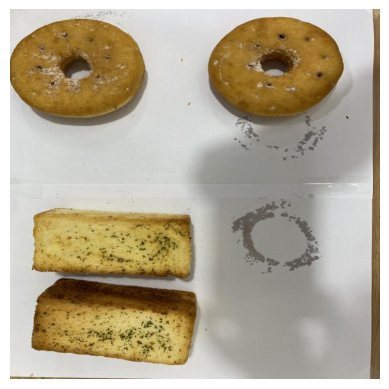

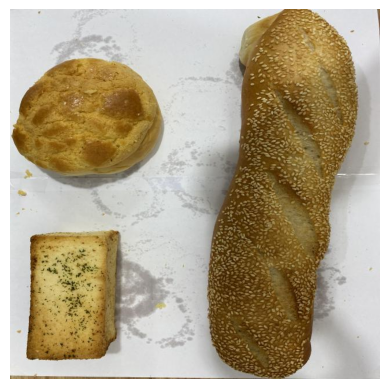

In [4]:
from PIL import Image
import matplotlib.pyplot as plt

img_dir = "bread-8/train"
img_files = os.listdir(img_dir)

# Show the first 5 images
for img_name in img_files[:5]:
    img_path = os.path.join(img_dir, img_name)
    img = Image.open(img_path)
    plt.imshow(img)
    # plt.title(img_name)
    plt.axis('off')
    plt.show()


In [7]:
import json

json_path = "bread-8/train/_annotations.coco.json"
with open(json_path, "r") as f:
    data = json.load(f)

# To print everything (can be long!):
print(json.dumps(data, indent=2))

# To peek at the structure:
print("Top-level keys:", data.keys())
print("Number of images:", len(data["images"]))
print("Number of annotations:", len(data["annotations"]))
print("Number of categories:", len(data["categories"]))
print("Example image entry:", data["images"][0])
print("Example annotation entry:", data["annotations"][0])
print("Example category entry:", data["categories"][0])


{
  "info": {
    "year": "2023",
    "version": "8",
    "description": "Exported from roboflow.ai",
    "contributor": "",
    "url": "https://public.roboflow.ai/object-detection/undefined",
    "date_created": "2023-02-07T15:56:41+00:00"
  },
  "licenses": [
    {
      "id": 1,
      "url": "https://creativecommons.org/licenses/by/4.0/",
      "name": "CC BY 4.0"
    }
  ],
  "categories": [
    {
      "id": 0,
      "name": "bread",
      "supercategory": "none"
    },
    {
      "id": 1,
      "name": "Baguette",
      "supercategory": "bread"
    },
    {
      "id": 2,
      "name": "Cake",
      "supercategory": "bread"
    },
    {
      "id": 3,
      "name": "Garlic",
      "supercategory": "bread"
    },
    {
      "id": 4,
      "name": "Pineapple",
      "supercategory": "bread"
    },
    {
      "id": 5,
      "name": "Seaweed",
      "supercategory": "bread"
    },
    {
      "id": 6,
      "name": "berry",
      "supercategory": "bread"
    },
    {
      "id": 7

In [6]:
splits = ["train", "valid", "test"]
base_dir = "bread-8"

all_crops = []
all_crop_paths = []

for split in splits:
    img_dir = f"{base_dir}/{split}"
    ann_path = f"{img_dir}/_annotations.coco.json"
    crops_dir = f"{img_dir}/crops"
    os.makedirs(crops_dir, exist_ok=True)
    if not os.path.exists(ann_path):
        print(f"Warning: {ann_path} does not exist, skipping split.")
        continue

    # Load COCO annotation
    with open(ann_path, "r") as f:
        coco = json.load(f)

    id2filename = {img['id']: img['file_name'] for img in coco['images']}
    id2category = {cat['id']: cat['name'] for cat in coco['categories']}

    for ann in coco['annotations']:
        image_id = ann['image_id']
        bbox = ann['bbox']  # [x, y, width, height]
        category_id = ann['category_id']
        cat_name = id2category.get(category_id, "unknown")

        file_path = os.path.join(img_dir, id2filename[image_id])
        if not os.path.exists(file_path):
            print(f"Image {file_path} does not exist, skipping.")
            continue

        image = Image.open(file_path).convert("RGB")
        x, y, w, h = map(int, bbox)
        if w <= 0 or h <= 0:
          print(f"Skipping annotation {ann['id']} in {file_path} due to non-positive width/height: {w}, {h}")
          continue
        crop = image.crop((x, y, x + w, y + h))
        if crop.size[0] == 0 or crop.size[1] == 0:
          print(f"Skipping annotation {ann['id']} in {file_path} due to empty crop.")
          continue

        crop_filename = f"{crops_dir}/{image_id}_{ann['id']}_{cat_name}.jpg"
        crop.save(crop_filename)

        all_crops.append(crop)
        all_crop_paths.append(crop_filename)

print(f"Total bread/cake crops: {len(all_crops)}")




Skipping annotation 154 in bread-8/train/IMG_4352_JPG.rf.8a1fa0652afe47e235efefd67e998a0e.jpg due to non-positive width/height: 0, 5
Total bread/cake crops: 1844


In [8]:
from transformers import AutoImageProcessor, AutoModel
import torch
import numpy as np
from tqdm import tqdm  # For progress bar

processor = AutoImageProcessor.from_pretrained("facebook/dinov2-base")
model = AutoModel.from_pretrained("facebook/dinov2-base")
model.eval() # .eval() puts the model in “evaluation mode” (not training, there is no dropout

features = []
for crop in tqdm(all_crops, desc="Extracting DINOv2 features"):
    inputs = processor(images=crop, return_tensors="pt")
    with torch.no_grad():
        out = model(**inputs).last_hidden_state
        embedding = out[:, 0, :].cpu().numpy().squeeze()  # [CLS] token
        features.append(embedding)

features = np.vstack(features)



The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


preprocessor_config.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


config.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

Extracting DINOv2 features: 100%|██████████| 1844/1844 [29:51<00:00,  1.03it/s]


In [17]:
from sklearn.cluster import KMeans

n_clusters = 12  # You can adjust this based on your dataset!
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(features)



Cluster 0 (size: 210)


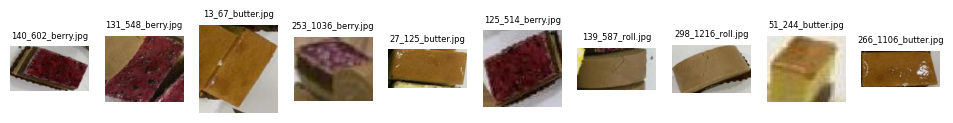


Cluster 1 (size: 190)



Cluster 2 (size: 269)


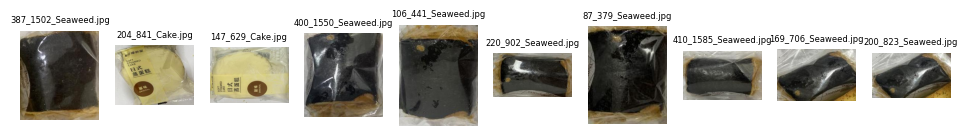


Cluster 3 (size: 238)


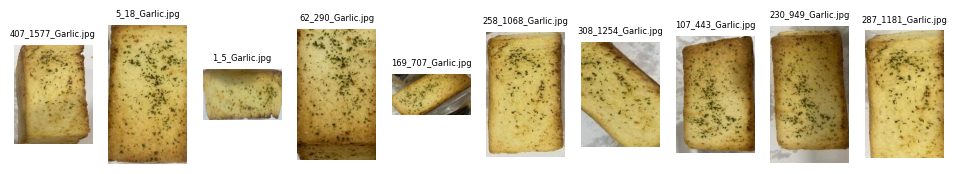


Cluster 4 (size: 228)



Cluster 5 (size: 117)


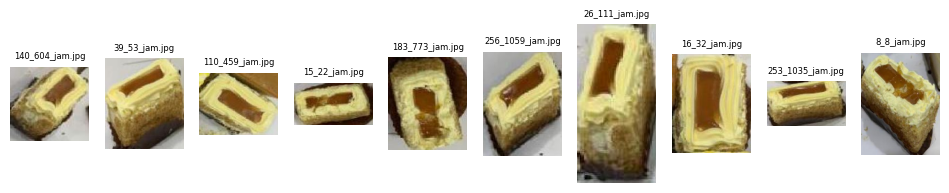


Cluster 6 (size: 88)



Cluster 7 (size: 85)


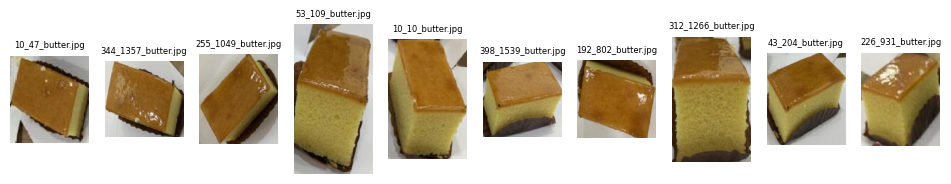


Cluster 8 (size: 121)


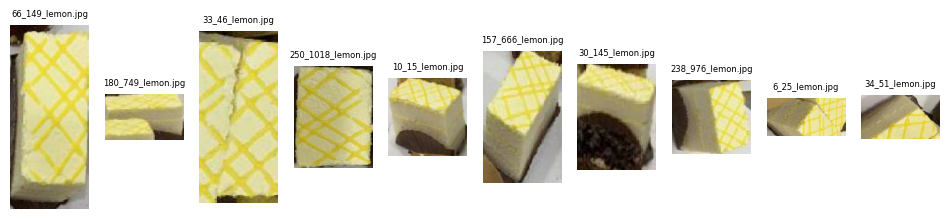


Cluster 9 (size: 98)



Cluster 10 (size: 85)



Cluster 11 (size: 115)


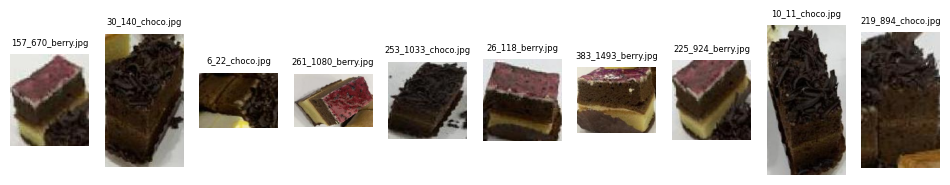

In [21]:
import matplotlib.pyplot as plt
import random

for cluster in range(n_clusters):
    idxs = np.where(labels == cluster)[0]
    print(f"\nCluster {cluster} (size: {len(idxs)})")
    plt.figure(figsize=(12, 3))
    for i, idx in enumerate(random.sample(list(idxs), min(10, len(idxs)))):
        plt.subplot(1, min(10, len(idxs)), i+1)
        plt.imshow(Image.open(all_crop_paths[idx]))
        plt.title(f"{os.path.basename(all_crop_paths[idx])}", fontsize=6)
        plt.axis("off")
    plt.show()


In [28]:
import os

# Extract true label from crop filename, e.g. "140_602_berry.jpg" → "berry"
true_labels = [os.path.basename(p).split("_")[-1].replace(".jpg", "") for p in all_crop_paths]

from collections import Counter

for cluster in range(n_clusters):
    idxs = [i for i, lbl in enumerate(labels) if lbl == cluster]
    cluster_labels = [true_labels[i] for i in idxs]
    counts = Counter(cluster_labels)
    if counts:
        most_common_label, count = counts.most_common(1)[0]
        purity = count / len(cluster_labels)
        print(f"Cluster {cluster}: purity = {purity:.2f}, most common label = {most_common_label}")
        print(f"Label counts: {counts}")
    else:
        print(f"Cluster {cluster}: Empty!")


Cluster 0: purity = 0.26, most common label = berry
Label counts: Counter({'berry': 55, 'butter': 46, 'lemon': 44, 'roll': 29, 'jam': 19, 'choco': 14, 'Seaweed': 2, 'donut': 1})
Cluster 1: purity = 0.99, most common label = Pineapple
Label counts: Counter({'Pineapple': 188, 'donut': 1, 'Seaweed': 1})
Cluster 2: purity = 0.80, most common label = Seaweed
Label counts: Counter({'Seaweed': 215, 'Cake': 52, 'Pineapple': 1, 'Garlic': 1})
Cluster 3: purity = 0.97, most common label = Garlic
Label counts: Counter({'Garlic': 230, 'Cake': 3, 'Pineapple': 2, 'Baguette': 1, 'Seaweed': 1, 'donut': 1})
Cluster 4: purity = 0.98, most common label = donut
Label counts: Counter({'donut': 223, 'Pineapple': 3, 'Seaweed': 1, 'Garlic': 1})
Cluster 5: purity = 0.99, most common label = jam
Label counts: Counter({'jam': 116, 'lemon': 1})
Cluster 6: purity = 0.95, most common label = Baguette
Label counts: Counter({'Baguette': 84, 'donut': 2, 'Garlic': 1, 'Pineapple': 1})
Cluster 7: purity = 1.00, most commo

In [30]:
import numpy as np
import matplotlib.pyplot as plt

unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts)
plt.xlabel("Cluster Label")
plt.ylabel("Number of Items")
plt.title("kMeans Cluster Sizes")
plt.show()



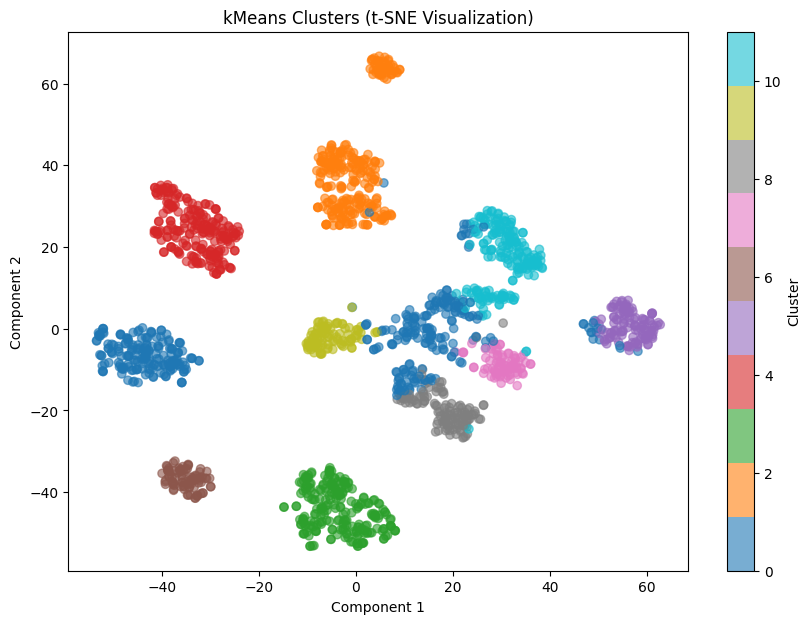

In [31]:
from sklearn.manifold import TSNE

# Reduce feature dimensionality for visualization (t-SNE to 2D)
tsne = TSNE(n_components=2, random_state=42)
proj = tsne.fit_transform(features)

plt.figure(figsize=(10,7))
scatter = plt.scatter(proj[:,0], proj[:,1], c=labels, cmap='tab10', alpha=0.6)
plt.title("kMeans Clusters (t-SNE Visualization)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(scatter, label='Cluster')
plt.show()
